# Monty Hall Problem
### Fernando Zavala

Import all libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

Function will reveal a door without a prize

In [2]:
# non winning door revealed
def losing_door(host, num_doors, chosen_door):
    i = 1
    while(i == host or i == chosen_door ):
        i = (i+1)%(num_doors)
    return i

this function will simulate the player switching doors after the first one is chosen

In [3]:
# player switches to unopened door
def switch_function(shown_door, num_doors, chosen_door):
    i = 1
    while( i == shown_door or i == chosen_door):
        i = (i+1)%(num_doors)
    return i

when this function is called the game is simulated and it will keep track of how many times the players wins or loses based on the decision to switch or not

In [4]:
def Monty_Hall_Game(switch, num_tests):
    # counters to keep track of results
    win_with_switch = 0
    win_without_switch = 0
    lose_with_switch = 0
    lose_without_switch = 0

    # create doors
    doors = ['A', 'B', 'C']
    num_doors = len(doors)

    for i in range(0, num_tests):
        # assign a door with a prize
        w_door = random.randint(0, num_doors-1)
        
        # player chooses a door at random
        player_choice = random.randint(0,num_doors-1)
        chosen_door = player_choice
        
        shown_door = losing_door(w_door, num_doors, chosen_door)

        if switch == True:
            chosen_door = switch_function(shown_door, num_doors, chosen_door)

        if chosen_door == w_door and switch == False:
            win_without_switch += 1

        elif chosen_door == w_door and switch == True:
            win_with_switch += 1

        elif chosen_door != w_door and switch == False:
            lose_without_switch += 1

        elif chosen_door != w_door and switch == True:
            lose_with_switch += 1

        else:
            print(f"ERROR!")

    return win_with_switch, win_without_switch, lose_with_switch, lose_without_switch, num_tests

Simulation is ran twice. Once 1,000,000 times when the player only switches doors when the oportunity is given and another 1,000,000 times without switching the chosen door

In [5]:
# Run simulation with switching 1 million times
x = Monty_Hall_Game(True, 1_000_000)
# Run simulation without switching
y = Monty_Hall_Game(False, 1_000_000)


Results are printed out and percentages are calculated

In [6]:
# Print results and calculate percentages
print(f"Number of wins with switching: {x[0]}")
print(f"Number of loses with switching: {x[2]}")
win_with_switch_percentage = (x[0] / x[4]) * 100
lose_percentage_with_switch = (x[2] / x[4]) * 100

print(f"percentage of winning with switching: {win_with_switch_percentage:.2f}%")
print(f"Percentage of loses with switching: {lose_percentage_with_switch:.2f}%\n")
print(f"Number of wins without swithing: {y[1]}")
print(f"Number of loses without switching: {y[3]}")
win_percentage_without_switching = (y[1]/y[4]) * 100
lose_percentage_without_switching = (y[3] / y[4]) * 100

print(f"Percentage of winning without switching: {win_percentage_without_switching:.2f}%")
print(f"Percentage of losing without switching: {lose_percentage_without_switching:.2f}%\n")

Number of wins with switching: 667055
Number of loses with switching: 332945
percentage of winning with switching: 66.71%
Percentage of loses with switching: 33.29%

Number of wins without swithing: 333144
Number of loses without switching: 666856
Percentage of winning without switching: 33.31%
Percentage of losing without switching: 66.69%



The results are then ploted on a pie chart to show the probability of winning when switching doors compared to the probablity of keeping the same door. When a player chooses to switch the door the chance of winning is at around 66%

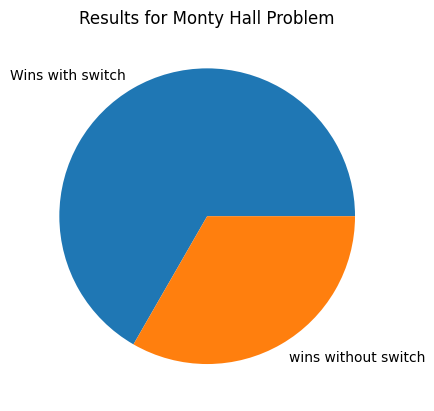

In [7]:
# Print pie graph of wins
wins = [x[0], y[1]]
result_labels = ['Wins with switch', 'wins without switch']

plt.title('Results for Monty Hall Problem')
plt.pie(wins, labels = result_labels)
plt.show()


The program is ran again 5,000 times when a player choses to switch doors. The results are plotted in a line graph and shows the percentage of winning steadies at around 66% the more games are played.

In [8]:
num_tests = []
w_percent = []
switch = True
for i in range(1, 5000):
    num_tests.append(i)
    z = Monty_Hall_Game(switch, i)
    res = (z[0] / z[4]) * 100
    w_percent.append(res)

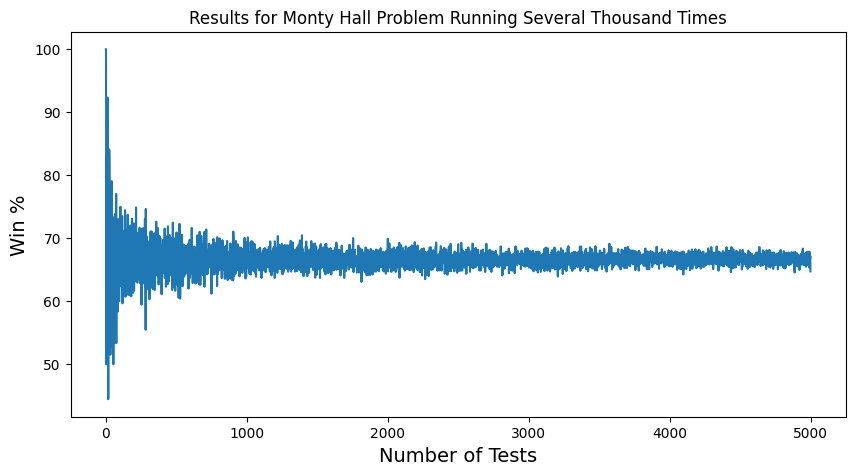

In [9]:
# Set width and height
plt.figure(figsize = (10, 5))
plt.plot(num_tests, w_percent)
plt.title('Results for Monty Hall Problem Running Several Thousand Times')
plt.xlabel('Number of Tests',fontsize=14)
plt.ylabel('Win %',fontsize=14)
plt.show()